In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras. models import Sequential
from keras. layers import SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

data=pd.read_csv('/content/drive/MyDrive/Deep Learning Projects/Stock Prediction/Google_Stock_Price_Train (1).csv')
print(data.head())
print(data.shape)

data['Date'] = pd.to_datetime(data['Date'])
data['year']= data['Date'].dt.year
data['month']= data['Date'].dt.month
data['day']= data['Date'].dt.day

features=['year','month','day']
X=data[features]
y=data['Open']
#open is the column u want to predict
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
y_scaled=scaler.fit_transform(y.values.reshape(-1,1))
#-1 is used when u don't know the dimension 1 is used for 1 column

timesteps=50
X_sequence=[]
y_sequence=[]
for i in range(timesteps,len(X_scaled)):
  X_sequence.append(X_scaled[i-timesteps:i])
  y_sequence.append(y_scaled[i])

X_sequence,y_sequence=np.array(X_sequence),np.array(y_sequence)

X_train,X_test,y_train,y_test=train_test_split(X_sequence,y_sequence,test_size=0.2,random_state=0)

model=Sequential()
model.add(SimpleRNN(units=50,activation='tanh',input_shape=(50,3),return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
model.add(Dropout(0.2)) # one hidden one output and one input
#model.add(SimpleRNN(units=50))
#model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

model.fit(X_train,y_train,epochs=10,batch_size=10,verbose=1)

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
(1258, 6)
Epoch 1/10
97/97 [==============================] - 7s 40ms/step - loss: 0.1412 - mse: 0.1412
Epoch 2/10
97/97 [==============================] - 3s 30ms/step - loss: 0.0489 - mse: 0.0489
Epoch 3/10
97/97 [==============================] - 3s 30ms/step - loss: 0.0304 - mse: 0.0304
Epoch 4/10
97/97 [==============================] - 3s 32ms/step - loss: 0.0220 - mse: 0.0220
Epoch 5/10
97/97 [==============================] - 7s 74ms/step - loss: 0.0187 - mse: 0.0187
Epoch 6/10
97/97 [==============================] - 3s 30ms/step - loss: 0.0161 - mse: 0.0161
Epoch 7/10
97/97 [==============================] - 3s 30ms/step - loss: 0.0142 - mse: 0.0

In [3]:
y_pred_scaled=model.predict(X_test)
y_pred_scaled = y_pred_scaled[:, -1, :]  # Extract the last timestep's prediction
y_pred=scaler.inverse_transform(y_pred_scaled)
y_test_true=scaler.inverse_transform(y_test)


8/8 [==============================] - 1s 24ms/step


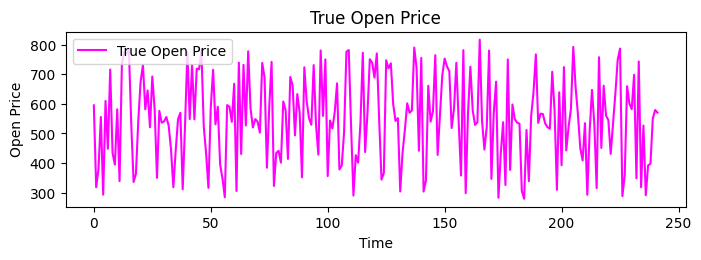

In [4]:
plt.figure(figsize=(8,5))
plt.subplot(2,1,1)#2rows 1col and select one
plt.plot(y_test_true,label='True Open Price',color='magenta')
plt.title('True Open Price')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()


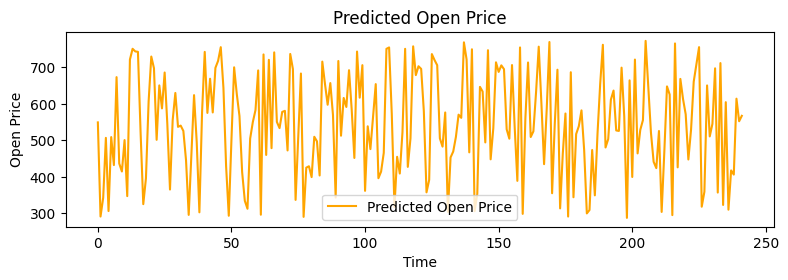

In [5]:
plt.figure(figsize=(8,5))
plt.subplot(2,1,2)#2rows 1col and select one
plt.plot(y_pred,label='Predicted Open Price',color='orange')
plt.title('Predicted Open Price')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()

plt.tight_layout()
plt.show()

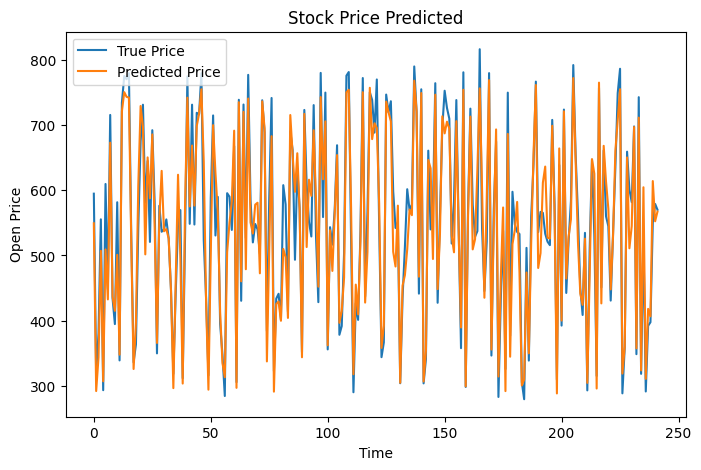

In [6]:
plt.figure(figsize=(8,5))
#plt.subplot(2,1,1)#2rows 1col and select one
plt.plot(y_test_true,label='True Price')
plt.plot(y_pred,label='Predicted Price')
plt.title('Stock Price Predicted')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.show()